# Financial Risk Prediction

### Exploratory Data Analysis

In [1]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('Bondora_raw.csv',low_memory=False)

In [2]:
df.shape

(134529, 112)

In [3]:
df['Status'].value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

In [4]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,17,5,2.0,1,61,1947-11-26,1.0,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.0,0,0.0,0.0,25,True,1800.0000,319.0800,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.0,0.0,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,2009-06-10 15:48:57,2009-06-15,2009-07-07,2009-07-15,2009-07-15,2009-07-15,20,4,2.0,1,48,1960-11-05,1.0,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,0,3.0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.0,NaN,8300.0,0.0,0.0,0.0,0.0,0.0,2500.0,10800.0,0,0.0,0,0.0,0.0,15,True,2200.0000,45.8300,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.0,0.0,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,2009-06-05 19:12:29,2009-06-15,NaN,2009-07-27,2011-02-25,2014-05-13,20,6,2.0,1,58,1950-11-13,1.0,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,0,3.0,UpTo4Years,teenindaja,MoreThan25Years,9.0,NaN,5000.0,0.0,0.0,0.0,0.0,0.0,2000.0,7000.0,0,0.0,0,0.0,0.0,25,True,319.5409,197.2926,2012-10-01,2813.0,2012-05-14,2935.0,2012-01-13,NaN,NaN,NaN,NaN,2012-07-16,116.35,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,2016-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late,True,180+,180+,NaN,NaN,NaN,NaN,203.1909,59.7626,0.0,0.0,116.35,414.07,0,0.0000,

### Data Understanding

| Feature                                | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|----------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ActiveLateCategory                     | When a loan is in Principal Debt then it will be categorized by Principal Debt days                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| ActiveLateLastPaymentCategory          | Shows how many days has passed since last payment and categorised if it is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| ActiveScheduleFirstPaymentReached      | Whether the first payment date has been reached according to the active schedule                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| Age                                    | The age of the borrower when signing the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Amount                                 | Amount the borrower received on the Primary Market. This is the principal balance of your purchase from Secondary Market                                                                                                                                                                                                                                                                                                                                                                                            |
| AmountOfPreviousLoansBeforeLoan        | Value of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| AppliedAmount                          | The amount borrower applied for originally                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| AuctionBidNumber                       | Unique bid number which is accompanied by Auction number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| AuctionId                              | A unique number given to all auctions                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| AuctionName                            | Name of the Auction, in newer loans it is defined by the purpose of the loan                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| AuctionNumber                          | Unique auction number which is accompanied by Bid number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| BidPrincipal                           | On Primary Market BidPrincipal is the amount you made your bid on. On Secondary Market BidPrincipal is the purchase price                                                                                                                                                                                                                                                                                                                                                                                           |
| BidsApi                                | The amount of investment offers made via Api                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| BidsManual                             | The amount of investment offers made manually                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| BidsPortfolioManager                   | The amount of investment offers made by Portfolio Managers                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BoughtFromResale_Date                  | The time when the investment was purchased from the Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| City                                   | City of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ContractEndDate                        | The date when the loan contract ended                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| Country                                | Residency of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| County                                 | County of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| CreditScoreEeMini                      | 1000 No previous payments problems 900 Payments problems finished 24-36 months ago 800 Payments problems finished 12-24 months ago 700 Payments problems finished 6-12 months ago 600 Payment problems finished < 6 months ago 500 Active payment problems                                                                                                                                                                                                                                                          |
| CreditScoreEsEquifaxRisk               | Generic score for the loan applicants that do not have active past due operations in ASNEF; a measure of the probability of default one year ahead; the score is given on a 6-grade scale: AAA (“Very low”), AA (“Low”), A (“Average”), B (“Average High”), C (“High”), D (“Very High”).                                                                                                                                                                                                                            |
| CreditScoreEsMicroL                    | A score that is specifically designed for risk classifying subprime borrowers (defined by Equifax as borrowers that do not have access to bank loans); a measure of the probability of default one month ahead; the score is given on a 10-grade scale, from the best score to the worst: M1, M2, M3, M4, M5, M6, M7, M8, M9, M10.                                                                                                                                                                                  |
| CreditScoreFiAsiakasTietoRiskGrade     | Credit Scoring model for Finnish Asiakastieto RL1 Very low risk 01-20 RL2 Low risk 21-40 RL3 Average risk 41-60 RL4 Big risk 61-80 RL5 Huge risk 81-100                                                                                                                                                                                                                                                                                                                                                             |
| CurrentDebtDaysPrimary                 | How long the loan has been in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| CurrentDebtDaysSecondary               | How long the loan has been in Interest Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| DateOfBirth                            | The date of the borrower's birth                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| DebtOccuredOn                          | The date when Principal Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| DebtOccuredOnForSecondary              | The date when Interest Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| DebtToIncome                           | Ratio of borrower's monthly gross income that goes toward paying loans                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| DefaultDate                            | The date when loan went into defaulted state and collection process was started                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| DesiredDiscountRate                    | Investment being sold at a discount or premium                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| EAD1                                   | Exposure at default, outstanding principal at default                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| EAD2                                   | Exposure at default, loan amount less all payments prior to default                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Education                              | 1 Primary education 2 Basic education 3 Vocational education 4 Secondary education 5 Higher education                                                                                                                                                                                                                                                                                                                                                                                                               |
| EL_V0                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V1                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V2                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EmploymentDurationCurrentEmployer      | Employment time with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EmploymentPosition                     | Employment position with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| EmploymentStatus                       | 1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree                                                                                                                                                                                                                                                                                                                                                                                                                         |
| ExistingLiabilities                    | Borrower's number of existing liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ExpectedLoss                           | Expected Loss calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ExpectedReturn                         | Expected Return calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| FirstPaymentDate                       | First payment date according to initial loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| FreeCash                               | Discretionary income after monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Gender                                 | 0 Male 1 Woman 2 Undefined                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| GracePeriodEnd                         | Date of the end of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| GracePeriodStart                       | Date of the beginning of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| HomeOwnershipType                      | 0 Homeless 1 Owner 2 Living with parents 3 Tenant, pre-furnished property 4 Tenant, unfurnished property 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Other                                                                                                                                                                                                                                                                                                              |
| IncomeFromChildSupport                 | Borrower's income from alimony payments                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| IncomeFromFamilyAllowance              | Borrower's income from child support                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeFromLeavePay                     | Borrower's income from paternity leave                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| IncomeFromPension                      | Borrower's income from pension                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| IncomeFromPrincipalEmployer            | Borrower's income from its employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| IncomeFromSocialWelfare                | Borrower's income from social support                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| IncomeOther                            | Borrower's income from other sources                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeTotal                            | Borrower's total income                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Interest                               | Maximum interest rate accepted in the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyBalance              | Unpaid interest and penalties                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| InterestAndPenaltyDebtServicingCost    | Service cost related to the recovery of the debt based on the interest and penalties of the investment                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyPaymentsMade         | Note owner received loan transfers earned interest, penalties total amount                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| InterestAndPenaltyWriteOffs            | Interest that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| InterestLateAmount                     | Interest debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| InterestRecovery                       | Interest recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LanguageCode                           | 1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| LastPaymentOn                          | The date of the current last payment received from the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LiabilitiesTotal                       | Total monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ListedOnUTC                            | Date when the loan application appeared on Primary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| LoanDate                               | Date when the loan was issued                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| LoanDuration                           | Current loan duration in months                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LoanId                                 | A unique ID given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| LoanNumber                             | A unique number given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| LoanStatusActiveFrom                   | How long the current status has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| LossGivenDefault                       | Gives the percentage of outstanding exposure at the time of default that an investor is likely to lose if a loan actually defaults. This means the proportion of funds lost for the investor after all expected recovery and accounting for the time value of the money recovered. In general, LGD parameter is intended to be estimated based on the historical recoveries. However, in new markets where limited experience does not allow us more precise loss given default estimates, a LGD of 90% is assumed. |
| MaritalStatus                          | 1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| MaturityDate_Last                      | Loan maturity date according to the current payment schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| MaturityDate_Original                  | Loan maturity date according to the original loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| ModelVersion                           | The version of the Rating model used for issuing the Bondora Rating                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| MonthlyPayment                         | Estimated amount the borrower has to pay every month                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| MonthlyPaymentDay                      | The day of the month the loan payments are scheduled for The actual date is adjusted for weekends and bank holidays (e.g. if 10th is Sunday then the payment will be made on the 11th in that month)                                                                                                                                                                                                                                                                                                                |
| NewCreditCustomer                      | Did the customer have prior credit history in Bondora 0 Customer had at least 3 months of credit history in Bondora 1 No prior credit history in Bondora                                                                                                                                                                                                                                                                                                                                                            |
| NextPaymentDate                        | According to schedule the next date for borrower to make their payment                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NextPaymentNr                          | According to schedule the number of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NextPaymentSum                         | According to schedule the amount of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoOfPreviousLoansBeforeLoan            | Number of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| note_id                                | A unique ID given to the investments                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoteLoanLateChargesPaid                | The amount of late charges the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| NoteLoanTransfersInterestAmount        | The amount of interest the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| NoteLoanTransfersMainAmount            | The amount of principal the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| NrOfDependants                         | Number of children or other dependants                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NrOfScheduledPayments                  | According to schedule the count of scheduled payments                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| OccupationArea                         | 1 Other 2 Mining 3 Processing 4 Energy 5 Utilities 6 Construction 7 Retail and wholesale 8 Transport and warehousing 9 Hospitality and catering 10 Info and telecom 11 Finance and insurance 12 Real-estate 13 Research 14 Administrative 15 Civil service & military 16 Education 17 Healthcare and social help 18 Art and entertainment 19 Agriculture, forestry and fishing                                                                                                                                      |
| OnSaleSince                            | Time when the investment was added to Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| PenaltyLateAmount                      | Late charges debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PlannedInterestPostDefault             | The amount of interest that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| PlannedInterestTillDate                | According to active schedule the amount of interest the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PlannedPrincipalPostDefault            | The amount of principal that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| PlannedPrincipalTillDate               | According to active schedule the amount of principal the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PreviousEarlyRepaymentsBeforeLoan      | How much was the early repayment amount before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PreviousEarlyRepaymentsCountBeforeLoan | How many times the borrower had repaid early                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PreviousRepaymentsBeforeLoan           | How much the borrower had repaid before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalBalance                       | Principal that still needs to be paid by the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalDebtServicingCost             | Service cost related to the recovery of the debt based on the principal of the investment                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PrincipalLateAmount                    | Principal debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalOverdueBySchedule             | According to the current schedule, principal that is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PrincipalPaymentsMade                  | Note owner received loan transfers principal amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| PrincipalRecovery                      | Principal recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalWriteOffs                     | Principal that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ProbabilityOfDefault                   | Probability of Default, refers to a loan’s probability of default within one year horizon.                                                                                                                                                                                                                                                                                                                                                                                                                          |
| PurchasePrice                          | Investment amount or secondary market purchase price                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Rating                                 | Bondora Rating issued by the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Rating_V0                              | Bondora Rating issued by version 0 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V1                              | Bondora Rating issued by version 1 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V2                              | Bondora Rating issued by version 2 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| RecoveryStage                          | Current stage according to the recovery model 1 Collection 2 Recovery 3 Write Off                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| RefinanceLiabilities                   | The total amount of liabilities after refinancing                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| ReScheduledOn                          | The date when the a new schedule was assigned to the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| Restructured                           | The original maturity date of the loan has been increased by more than 60 days                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| SoldInResale_Date                      | The date when the investment was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| SoldInResale_Price                     | The price of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| SoldInResale_Principal                 | The principal remaining of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| StageActiveSince                       | How long the current recovery stage has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Status                                 | The current status of the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| UseOfLoan                              | 0 Loan consolidation 1 Real estate 2 Home improvement 3 Business 4 Education 5 Travel 6 Vehicle 7 Other 8 Health 101 Working capital financing 102 Purchase of machinery equipment 103 Renovation of real estate 104 Accounts receivable financing 105 Acquisition of means of transport 106 Construction finance 107 Acquisition of stocks 108 Acquisition of real estate 109 Guaranteeing obligation 110 Other business All codes in format 1XX are for business loans that are not supported since October 2012  |
| UserName                               | The user name generated by the system for the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| VerificationType                       | Method used for loan application data verification 0 Not set 1 Income unverified 2 Income unverified, cross-referenced by phone 3 Income verified 4 Income and expenses verified                                                                                                                                                                                                                                                                                                                                    |
| WorkExperience                         | Borrower's overall work experience in years                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| WorseLateCategory                      | Displays the last longest period of days when the loan was in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| XIRR                                   | XIRR (extended internal rate of return) is a methodology to calculate the net return using the loan issued date and amount, loan repayment dates and amounts and the principal balance according to the original repayment date. All overdue principal payments are written off immediately. No provisions for future losses are made & only received (not accrued or scheduled) interest payments are taken into account.                                                                                          |

### Percentage of Missing Values

In [5]:
# To show all the columns of pandas dataframe with missing values percentage
df.isnull().sum()/len(df)*100

ReportAsOfEOD                           0.000000
LoanId                                  0.000000
LoanNumber                              0.000000
ListedOnUTC                             0.000000
BiddingStartedOn                        0.000000
                                         ...    
NrOfScheduledPayments                  27.310840
ReScheduledOn                          70.027280
PrincipalDebtServicingCost             56.047395
InterestAndPenaltyDebtServicingCost    56.047395
ActiveLateLastPaymentCategory          61.160791
Length: 112, dtype: float64

In [6]:
#printing the columns having more than 40% missing values
df.columns[df.isnull().mean()>0.4]

Index(['ContractEndDate', 'NrOfDependants', 'EmploymentPosition',
       'WorkExperience', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary',
       'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary', 'DefaultDate',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage',
       'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'ActiveLateCategory', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini',
       'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs',
       'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn',
       'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost',
       'ActiveLateLastPaymentCategory'],
      dtype='object')

In [7]:
# print missing values columns 
miss_col=['ContractEndDate', 'NrOfDependants', 'EmploymentPosition',
       'WorkExperience', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary',
       'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage',
       'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'ActiveLateCategory', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini',
       'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs',
       'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn',
       'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost',
       'ActiveLateLastPaymentCategory']

In [8]:
# drop missing  values columns
df.drop(labels=['ContractEndDate', 'NrOfDependants', 'EmploymentPosition',
       'WorkExperience', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary',
       'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage',
       'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'ActiveLateCategory', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini',
       'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs',
       'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn',
       'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost',
       'ActiveLateLastPaymentCategory'],axis=1, inplace=True)

In [9]:
df['NrOfScheduledPayments'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: NrOfScheduledPayments, dtype: float64

Apart from missing value features there are some features which will have no role in default prediction like 'ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth' (because age is already present), 'BiddingStartedOn','UserName','NextPaymentNr','NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension', 'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare','IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther' (As Total income is already present which is total of all these income), 'LoanApplicationStartedDate','ApplicationSignedHour', 'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate', 'LastPaymentOn', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn', 'ProbabilityOfDefault', 'PrincipalOverdueBySchedule', 'StageActiveSince', 'ModelVersion','WorseLateCategory'

In [10]:
cols_del = ['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth',
       'BiddingStartedOn','UserName','NextPaymentNr',
       'NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory']

In [11]:
df = df.drop(cols_del,axis=1)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
def univariate(df,col,vartype,hue =None):    
    '''
    Univariate function will plot parameter values in graphs.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuous or categorical
                Continuous(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : Only applicable in categorical analysis.
    '''
    sns.set(style="darkgrid")
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
    plt.show()

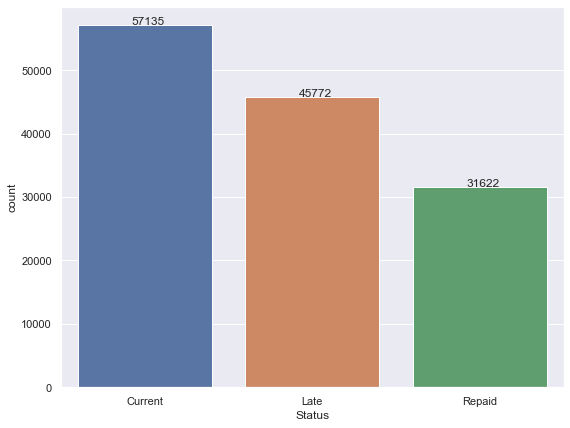

In [13]:
# let's find the counts of each status categories 
univariate(df=df,col='Status',vartype=1)

In [14]:
# filtering out Current Status records
df = df[(df['Status']=='Current')]

In [15]:
#1 in case default date is present.
df['DefaultDate'].loc[~df['DefaultDate'].isnull()]=1
# 0 will be assigned when default date is null means borrower has never defaulted
df['DefaultDate'].loc[df['DefaultDate'].isnull()]=0

In [16]:
df['DefaultDate'].tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [17]:
# check the counts of default and nondefault 
df.groupby(['DefaultDate'],as_index=True)['Status'].apply(pd.Series.value_counts)

DefaultDate         
0            Current    57014
1            Current      121
Name: Status, dtype: int64

In [18]:
# let's drop the status columns
df = df.drop('Status',axis=1)

In [19]:
# Renaming DefaultDate column to targetvariable
df.rename(columns={'DefaultDate':'targetvar'})

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,LastPaymentOn,targetvar,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
491,1355,0,645.0,True,2015-01-06,2015-02-16,2020-01-15,2021-01-15,3.0,4,28,0.0,FI,2000.0,2000.0,24.46,60,63.90,POHJOIS-SAVO,KUOPIO,7,5.0,2.0,3.0,UpTo2Years,6.0,1.0,2097.0,1,629.00,0,3.05,1404.10,15,2020-01-17,0,D,True,NaN,1387.57,1845.64,612.43,0.0,0,0.0,0.00,0
523,1000,0,0.0,False,2015-01-07,2015-03-06,2020-02-06,2021-11-08,4.0,1,27,0.0,EE,1000.0,1000.0,17.74,60,28.17,LÄÄNE-VIRUMAA,SÕMERU VALD,7,4.0,3.0,3.0,UpTo1Year,1.0,6.0,560.0,8,1327.37,2,47.56,43.67,6,2020-01-08,0,B,True,NaN,608.05,638.67,391.95,0.0,1,1300.0,187.87,0
536,2345,0,655.0,False,2015-01-07,2015-02-16,2020-01-14,2024-02-23,3.0,1,29,0.0,EE,3000.0,3000.0,17.87,60,84.72,PÄRNUMAA,PÄRNU,7,2.0,3.0,3.0,UpTo3Years,3.0,3.0,745.0,4,427.03,0,27.48,290.28,14,2020-01-23,0,B,True,NaN,1270.42,1890.24,1729.58,0.0,1,1000.0,623.89,0
541,2045,0,955.0,True,2015-01-08,2015-02-20,2020-01-20,2021-01-04,3.0,4,25,0.0,FI,3000.0,3000.0,27.98,60,102.12,POHJOIS-SAVO,KUOPIO,0,3.0,3.0,3.0,UpTo5Years,10.0,4.0,1530.0,4,955.00,0,36.41,472.88,27,2020-01-20,0,D,True,NaN,1916.72,3144.21,1083.28,0.0,0,0.0,0.00,0
544,1500,0,0.0,True,2015-01-08,2015-02-25,2020-01-27,2020-01-27,1.0,1,30,0.0,EE,1500.0,1500.0,29.25,60,52.84,TARTU,KABINA,7,4.0,2.0,5.0,MoreThan5Years,5.0,3.0,1500.0,2,465.00,0,4.52,982.16,25,2019-12-27,0,D,False,NaN,1453.11,1396.06,46.89,0.0,0,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134429,560,0,40.0,False,2014-12-29,2015-02-25,2019-01-25,2022-05-25,4.0,1,34,0.0,EE,600.0,600.0,30.00,48,23.35,LÄÄNE-VIRUMAA,VÄIKE-MAARJA,2,2.0,2.0,3.0,UpTo1Year,6.0,1.0,1200.0,4,791.33,0,15.36,655.65,25,2019-12-27,0,C,True,NaN,288.83,704.39,311.17,0.0,2,7000.0,2436.06,0
134455,2175,0,2725.0,True,2014-12-30,2015-02-25,2020-01-27,2020-01-27,4.0,1,57,0.0,EE,4900.0,4900.0,29.00,60,178.00,VÕRUMAA,"MÕNISTE VALD, SARU KÜLA",7,4.0,1.0,3.0,MoreThan5Years,3.0,1.0,583.0,6,567.31,3,34.13,14.00,25,2019-12-27,0,B,False,NaN,4748.29,4530.10,151.71,0.0,0,0.0,0.00,0
134483,1000,0,0.0,True,2015-01-02,2015-02-16,2020-01-15,2024-02-15,3.0,4,47,1.0,FI,1000.0,1000.0,21.76,60,30.40,SATAKUNTA,KAUVATSA,7,3.0,1.0,3.0,MoreThan5Years,17.0,1.0,1500.0,2,750.00,0,2.03,719.60,15,2020-01-15,0,C,True,NaN,946.61,658.52,53.39,0.0,0,0.0,0.00,0
134486,635,0,3465.0,True,2015-01-02,2015-02-12,2020-01-13,2021-12-15,4.0,1,31,1.0,EE,4100.0,4100.0,50.62,60,200.73,VILJANDI,KÕO,6,4.0,2.0,3.0,UpTo1Year,3.0,7.0,630.0,3,612.00,2,31.86,179.27,20,2020-01-15,0,HR,True,NaN,2246.60,7375.77,1853.40,0.0,0,0.0,0.00,0


In [20]:
# Checking datatype of all features
df.dtypes

BidsPortfolioManager                        int64
BidsApi                                     int64
BidsManual                                float64
NewCreditCustomer                            bool
LoanDate                                   object
FirstPaymentDate                           object
MaturityDate_Original                      object
MaturityDate_Last                          object
VerificationType                          float64
LanguageCode                                int64
Age                                         int64
Gender                                    float64
Country                                    object
AppliedAmount                             float64
Amount                                    float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
County                                     object
City                                       object


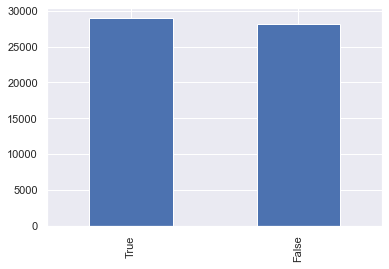

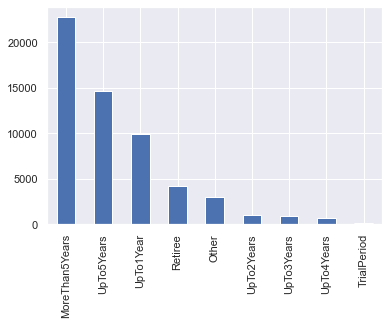

In [21]:
df['NewCreditCustomer'].value_counts().plot(kind='bar')
plt.show()

df['EmploymentDurationCurrentEmployer'].value_counts().plot(kind='bar')
plt.show()

- First we will delete all the features related to date as it is not a time series analysis so these features will not help in predicting target variable.
- As we can see in numeric column distribution there are many columns which are present as numeric but they are actually categorical as per data description such as Verification Type, Language Code, Gender, Use of Loan, Education, Marital Status,EmployementStatus, OccupationArea etc.
- So we will convert these features to categorical features
#### Now we will check the distribution of different categorical variables

In [22]:
df.drop(columns=['LoanDate','FirstPaymentDate','MaturityDate_Original','MaturityDate_Last','LastPaymentOn'], inplace=True)

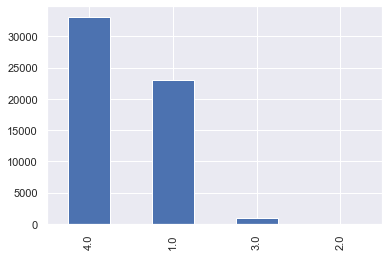

In [23]:
# checking distribution of VerificationType
df['VerificationType'].value_counts().plot(kind='bar')
plt.show()

In [24]:
#converting VerificationType to categorical features
df['VerificationType'].replace([1,2,3,4],['Income unverified', 'Income unverified, cross-referenced by phone', 'Income verified', 'Income and expenses verified'], inplace=True)

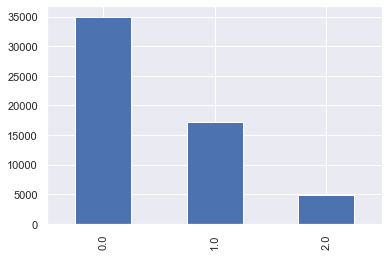

In [25]:
# checking distribution of Gender
df['Gender'].value_counts().plot(kind='bar')
plt.show()

In [26]:
df['Gender'].replace([0,1,2], ['Male', 'Female', 'Undefined'], inplace=True)

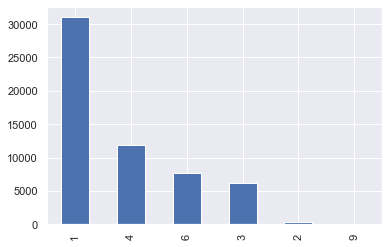

In [27]:
# checking distribution of LanguageCode
df['LanguageCode'].value_counts().plot(kind='bar')
plt.show()

As we can see from above in language code we have only descriptions for values 1,2,3,4,5,6, and 9 but it has other values too like 21,22,15,13,10 and 7 but they are very less it may happen they are local language codes whose decription is not present so we will be treated all these values as others

In [28]:
# write your code here
df['LanguageCode'].replace([1,2,3,4,5,6,9], ['Estonian' , 'English' , 'Russian' , 'Finnish' ,'German','Spanish' , 'Slovakian'], inplace=True)

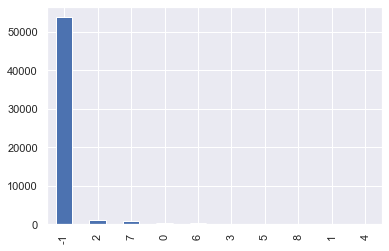

In [29]:
# checking distribution of UseOfLoan
df['UseOfLoan'].value_counts().plot(kind='bar')
plt.show()

As we can see from above stats most of the loans are -1 category whose description is not avaialble in Bondoro website so we have dig deeper to find that in Bondora most of the loans happened for which purpose so we find in Bondora Statistics Page most of the loans around 34.81% are for Not set purpose. so we will encode -1 as Not set category

In [30]:
df['UseOfLoan'].replace([-1,0,1,2,3,4,5,6,7,8],['Not_set', 'LoanConsolidation', 'RealEstate', 'HomeImprovement', 'Business', 'Education', 'Travel','Vehicle', 'Other', 'Health'], inplace=True)

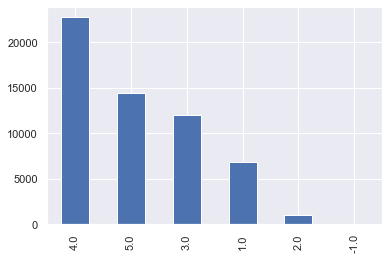

In [31]:
# checking distribution of Education
df['Education'].value_counts().plot(kind='bar')
plt.show()

Again as we can see from above description for -1 and 0 in case of education is not present so we will encode them as Not_present as we dont know anything about them.

In [32]:
df['Education'].replace([-1,1,2,3,4,5],['Not_present', 'Primary', 'Basic', 'Vocational', 'Secondary', 'Higher'], inplace=True)

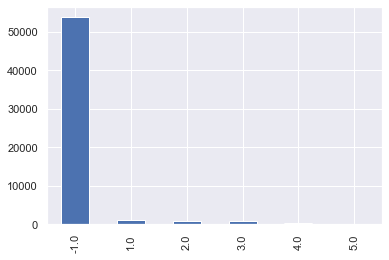

In [33]:
# checking distribution of MaritalStatus
df['MaritalStatus'].value_counts().plot(kind='bar')
plt.show()

Again Marital status of value 0 and -1 has no description so we will encode them as Not_specified

In [34]:
df['MaritalStatus'].replace([-1,1,2,3,4,5],['Not_specified', 'Married', 'Cohabitant', 'Single', 'Divorced', 'Widow'], inplace=True)

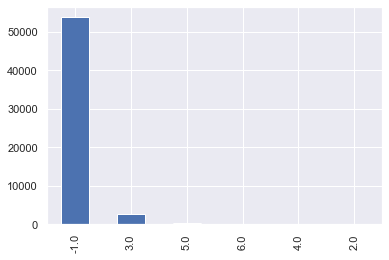

In [35]:
# checking distribution of EmploymentStatus
df['EmploymentStatus'].value_counts().plot(kind='bar')
plt.show()

In [36]:
df['EmploymentStatus'].replace([-1,2,3,4,5,6],['Not_defined', 'PartiallyEmployed', 'FullyEmployed', 'SelfEmployed', 'Entrepreneur', 'Retiree'], inplace=True)

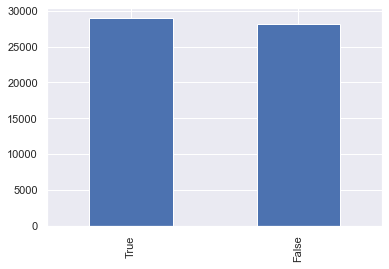

In [37]:
# checking distribution of NewCreditCustomer
df['NewCreditCustomer'].value_counts().plot(kind='bar')
plt.show()

In [38]:
df['NewCreditCustomer'].replace([True, False],['Yes','No'], inplace=True)

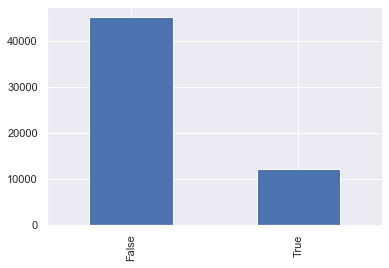

In [39]:
# checking distribution of Restructured
df['Restructured'].value_counts().plot(kind='bar')
plt.show()

In [40]:
df['Restructured'].replace([True, False],['Yes','No'], inplace=True)

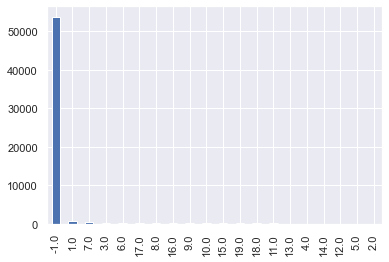

In [41]:
# checking distribution of OccupationArea
df['OccupationArea'].value_counts().plot(kind='bar')
plt.show()

In [42]:
df['OccupationArea'].replace([-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,19],['Not_mentioned', 'Other', 'Mining', 'Processing', 'Energy', 'Utilities','Construction', 'Retail', 'Transport','Hospitality', 'Telecom', 'Finance','RealEstate', 'Research', 'Administrative', 'CivilService', 'Education','Healthcare','Art', 'Agriculture'], inplace=True)

In [43]:
#for counts of EmploymentStatus 
df['EmploymentStatus'].value_counts()

Not_defined          53769
FullyEmployed         2751
Entrepreneur           312
Retiree                137
SelfEmployed            92
PartiallyEmployed       74
Name: EmploymentStatus, dtype: int64

In [44]:
#for counts of OccupationArea 
df['OccupationArea'].value_counts()

Not_mentioned     53769
Other               781
Retail              380
Processing          322
Construction        305
Healthcare          238
Transport           186
Education           179
Hospitality         156
Telecom             151
CivilService        129
Agriculture         107
Art                  95
Finance              94
Research             71
Energy               57
Administrative       45
RealEstate           44
Utilities            20
Mining                6
Name: OccupationArea, dtype: int64

In [45]:
#for counts of Restructured
df['Restructured'].value_counts()

No     45015
Yes    12120
Name: Restructured, dtype: int64

In [46]:
#for counts of NewCreditCustomer
df['NewCreditCustomer'].value_counts()

Yes    28941
No     28194
Name: NewCreditCustomer, dtype: int64

In [47]:
#for counts of HomeOwnershipType
df['HomeOwnershipType'].value_counts()

 1.0     22740
 3.0     12737
 2.0      8004
 8.0      6695
 10.0     4777
 7.0       636
 5.0       560
 4.0       551
 6.0       256
 9.0       178
-1.0         1
Name: HomeOwnershipType, dtype: int64

In [48]:
# save the final data
df.to_csv('Bondora_preprocessed.csv',index=False)

In [49]:
df=pd.read_csv('Bondora_preprocessed.csv')
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,DefaultDate,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,1355,0,645.0,Yes,Income verified,Finnish,28,Male,FI,2000.0,2000.0,24.46,60,63.90,POHJOIS-SAVO,KUOPIO,Other,Higher,Cohabitant,FullyEmployed,UpTo2Years,Construction,1.0,2097.0,1,629.00,0,3.05,1404.10,15,0,D,Yes,NaN,1387.57,1845.64,612.43,0.0,0,0.0,0.00,0
1,1000,0,0.0,No,Income and expenses verified,Estonian,27,Male,EE,1000.0,1000.0,17.74,60,28.17,LÄÄNE-VIRUMAA,SÕMERU VALD,Other,Secondary,Single,FullyEmployed,UpTo1Year,Other,6.0,560.0,8,1327.37,2,47.56,43.67,6,0,B,Yes,NaN,608.05,638.67,391.95,0.0,1,1300.0,187.87,0
2,2345,0,655.0,No,Income verified,Estonian,29,Male,EE,3000.0,3000.0,17.87,60,84.72,PÄRNUMAA,PÄRNU,Other,Basic,Single,FullyEmployed,UpTo3Years,Processing,3.0,745.0,4,427.03,0,27.48,290.28,14,0,B,Yes,NaN,1270.42,1890.24,1729.58,0.0,1,1000.0,623.89,0
3,2045,0,955.0,Yes,Income verified,Finnish,25,Male,FI,3000.0,3000.0,27.98,60,102.12,POHJOIS-SAVO,KUOPIO,LoanConsolidation,Vocational,Single,FullyEmployed,UpTo5Years,Telecom,4.0,1530.0,4,955.00,0,36.41,472.88,27,0,D,Yes,NaN,1916.72,3144.21,1083.28,0.0,0,0.0,0.00,0
4,1500,0,0.0,Yes,Income unverified,Estonian,30,Male,EE,1500.0,1500.0,29.25,60,52.84,TARTU,KABINA,Other,Secondary,Cohabitant,Entrepreneur,MoreThan5Years,Utilities,3.0,1500.0,2,465.00,0,4.52,982.16,25,0,D,No,NaN,1453.11,1396.06,46.89,0.0,0,0.0,0.00,0


## FEATURE ENGINEERING
     Loading Bondora Preprocessed Data
     Steps after Exploratory Data Analysis and Data Visualization

In [50]:
#importing libararies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#Loadig preprocessed data
df = pd.read_csv('Bondora_preprocessed.csv')

In [52]:
pd.set_option('display.max_columns',None)
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,DefaultDate,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,1355,0,645.0,Yes,Income verified,Finnish,28,Male,FI,2000.0,2000.0,24.46,60,63.90,POHJOIS-SAVO,KUOPIO,Other,Higher,Cohabitant,FullyEmployed,UpTo2Years,Construction,1.0,2097.0,1,629.00,0,3.05,1404.10,15,0,D,Yes,NaN,1387.57,1845.64,612.43,0.0,0,0.0,0.00,0
1,1000,0,0.0,No,Income and expenses verified,Estonian,27,Male,EE,1000.0,1000.0,17.74,60,28.17,LÄÄNE-VIRUMAA,SÕMERU VALD,Other,Secondary,Single,FullyEmployed,UpTo1Year,Other,6.0,560.0,8,1327.37,2,47.56,43.67,6,0,B,Yes,NaN,608.05,638.67,391.95,0.0,1,1300.0,187.87,0
2,2345,0,655.0,No,Income verified,Estonian,29,Male,EE,3000.0,3000.0,17.87,60,84.72,PÄRNUMAA,PÄRNU,Other,Basic,Single,FullyEmployed,UpTo3Years,Processing,3.0,745.0,4,427.03,0,27.48,290.28,14,0,B,Yes,NaN,1270.42,1890.24,1729.58,0.0,1,1000.0,623.89,0
3,2045,0,955.0,Yes,Income verified,Finnish,25,Male,FI,3000.0,3000.0,27.98,60,102.12,POHJOIS-SAVO,KUOPIO,LoanConsolidation,Vocational,Single,FullyEmployed,UpTo5Years,Telecom,4.0,1530.0,4,955.00,0,36.41,472.88,27,0,D,Yes,NaN,1916.72,3144.21,1083.28,0.0,0,0.0,0.00,0
4,1500,0,0.0,Yes,Income unverified,Estonian,30,Male,EE,1500.0,1500.0,29.25,60,52.84,TARTU,KABINA,Other,Secondary,Cohabitant,Entrepreneur,MoreThan5Years,Utilities,3.0,1500.0,2,465.00,0,4.52,982.16,25,0,D,No,NaN,1453.11,1396.06,46.89,0.0,0,0.0,0.00,0


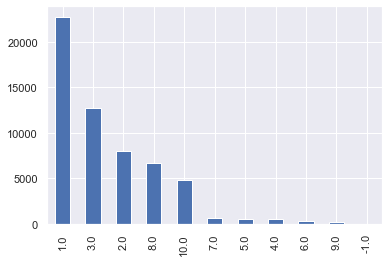

In [53]:
# checking distribution of HomeOwnershipType
df['HomeOwnershipType'].value_counts().plot(kind='bar')
plt.show()

In [54]:
df['HomeOwnershipType'].replace([-1,0,1,2,3,4,5,6,7,8,10],['Not_specified', 'Homeless', 'Owner', 'Livingwithparents', 'Tenant,pre-furnishedproperty', 'Tenant,unfurnishedproperty',' Councilhouse','Jointtenant','Joint ownership','Mortgage','Other'], inplace=True)

In [55]:
#available missing values in the dataset
df.isnull().sum()

BidsPortfolioManager                          0
BidsApi                                       0
BidsManual                                    0
NewCreditCustomer                             0
VerificationType                              0
LanguageCode                                  0
Age                                           0
Gender                                        0
Country                                       0
AppliedAmount                                 0
Amount                                        0
Interest                                      0
LoanDuration                                  0
MonthlyPayment                               58
County                                    16325
City                                       4750
UseOfLoan                                     0
Education                                     0
MaritalStatus                                 0
EmploymentStatus                              0
EmploymentDurationCurrentEmployer       

In [56]:
df.County.unique()

array(['POHJOIS-SAVO', 'LÄÄNE-VIRUMAA', 'PÄRNUMAA', 'TARTU',
       'CASTILLA Y LEÓN', 'KUOPIO', 'BARCELONA', 'HARJU',
       'ETELÄ-POHJANMAA', 'SAARE', 'VASARAINEN', 'KYMENLAAKSO',
       'PIRKANMAA', 'POHJANMAA', 'JÕGEVAMAA', 'VILJANDI', 'JÕGEVA',
       'MADRID', 'ETELÄ-KARJALA', 'RAPLA', 'PÕLVAMAA', 'UUSIMAA',
       'TARUMAA', 'VALGA', 'JÄRVAMAA', 'VÕRUMAA', 'KIRKKONUMMI',
       'IDA-VIRU', nan, 'UUDENMAAN', 'PÄRNU LINN', 'GALICIA',
       'KESKI-SUOMI', 'COMUNIDAD DE MADRID', 'ESPOO', 'POHJOIS-SAVON',
       'CASTILLA-LA MANCHA', 'UUDIMAA', 'KANTA-HÄME', 'VANTAA',
       'POHJOIS-POHJANMAAN', 'PÄRNU MAAKOND', 'JÕGEVA MAAKOND',
       'VARSINAIS-SUOMI', 'LAS PALMAS', 'COMUNIDAD VALENCIANA',
       'PÄIJÄT-HÄMEEN MAAKUNTA', 'LÄNSI-SUOMI', 'LÄÄNE MAAKOND', 'OULU',
       'ETELÄ-SUOMI', 'LÄÄNE-VIRU MAAKOND', 'JÄRVA', 'SAARE MAAKOND',
       'JÄRVA MAAKOND', 'SATAKUNTA', 'CANTABRIA', 'SEINÄJOKI',
       'CIUDAD REAL', 'LAPPEENRANTA', 'VARSINAIS SUOMI', 'VÕRU MAAKOND',
       'ETELÄ-

In [57]:
df.City.unique()

array(['KUOPIO', 'SÕMERU VALD', 'PÄRNU', ..., 'KEHTNA VALD RAPLA MAAKOND',
       'MÕNISTE VALD, SARU KÜLA', 'KÕO'], dtype=object)

In [58]:
# county and city are having too many categories
df.drop(labels = ['County', 'City'], axis = 1, inplace = True)

In [59]:
# dropping redundant variables 
df.drop(labels = ['NoOfPreviousLoansBeforeLoan','PreviousRepaymentsBeforeLoan','LanguageCode'],axis = 1, inplace = True)

In [60]:
# dropping invalid vars (i.e. the information we don't know at the time the loan is requested)
# also we already have LoanPeriod, so there no need for other dates
df.drop(labels = ['InterestAndPenaltyPaymentsMade','InterestAndPenaltyBalance', 'PrincipalBalance', 'PrincipalPaymentsMade'], axis = 1, inplace = True)

In [61]:
df.fillna(value = {'CreditScoreEsMicroL': 'Other','Rating': 'Other','HomeOwnershipType': 'Not_specified',
                   'EmploymentDurationCurrentEmployer': 'Other','EmploymentStatus': 'Not_defined',
                   'OccupationArea': 'Not_mentioned','Education': 'Not_set','Gender': 'Undefined',
                   'MaritalStatus': 'Not_present'}, axis = 0, inplace = True)

In [62]:
#checking number of categories per categorical variable
cat_vars = df.columns[df.dtypes == 'object']
for i, c in enumerate(cat_vars):
    print(cat_vars[i], len(df[c].unique()))

NewCreditCustomer 2
VerificationType 4
Gender 3
Country 4
UseOfLoan 10
Education 6
MaritalStatus 6
EmploymentStatus 6
EmploymentDurationCurrentEmployer 9
OccupationArea 20
HomeOwnershipType 11
Rating 9
Restructured 2
CreditScoreEsMicroL 9


<AxesSubplot:>

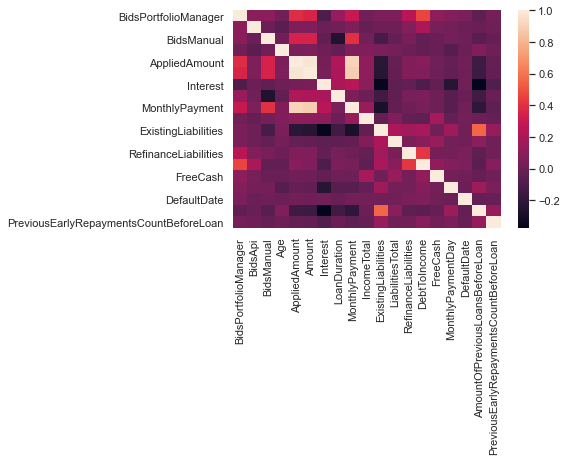

In [63]:
#checking correlation between numerical variables
temp = df.copy()
numerical = temp.columns[df.dtypes != 'object']
num_vars = temp[numerical]
sns.heatmap(num_vars.corr())

Amount is highly correlated with AppliedAmount and MonthlyPayment. BidsPortfolioManager is highly correlated with AppliedAmount/Amount

but only Amount should be removed because it's redundant MonthlyPayment and BidsPortfolioManager could still be useful

In [64]:
df.drop(labels = ['AppliedAmount'], axis = 1, inplace = True)

In [65]:
# checking correlations manually
corrs = num_vars.corr()
correlated_feature_pairs = []
for i, row in enumerate(corrs.values):
    for j, corr_val in enumerate(row):
        if 1 > corr_val > 0.5:
            if (i, j) not in correlated_feature_pairs \
                or (j, i) not in correlated_feature_pairs:
                correlated_feature_pairs.append((i, j))

In [66]:
for pair in correlated_feature_pairs:
    print(f'({num_vars.columns[pair[0]]}, {num_vars.columns[pair[1]]})')

(AppliedAmount, Amount)
(AppliedAmount, MonthlyPayment)
(Amount, AppliedAmount)
(Amount, MonthlyPayment)
(MonthlyPayment, AppliedAmount)
(MonthlyPayment, Amount)
(ExistingLiabilities, AmountOfPreviousLoansBeforeLoan)
(AmountOfPreviousLoansBeforeLoan, ExistingLiabilities)


In [67]:
# kdeplot
v = ['BidsPortfolioManager', 'BidsApi', 'BidsManual','Interest', 'LoanDuration', 'MonthlyPayment','IncomeTotal', 
     'ExistingLiabilities','LiabilitiesTotal', 'DebtToIncome', 'MonthlyPaymentDay', 'PreviousEarlyRepaymentsCountBeforeLoan']

In [68]:
# boxplot
b_vars = ['Age', 'Amount','LiabilitiesTotal']

In [69]:
to_plot = num_vars.sample(frac = 0.10, random_state = 111)

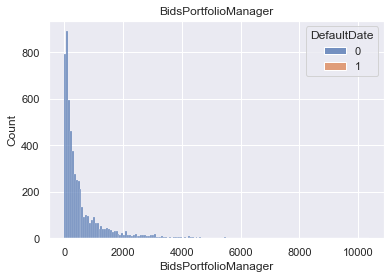

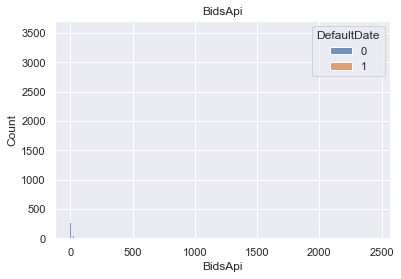

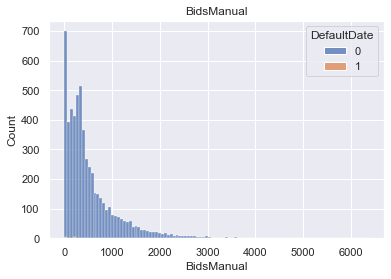

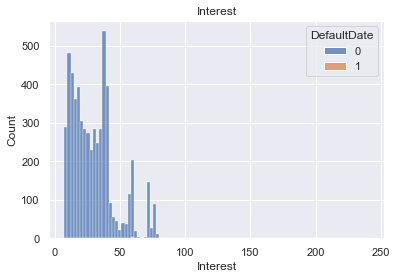

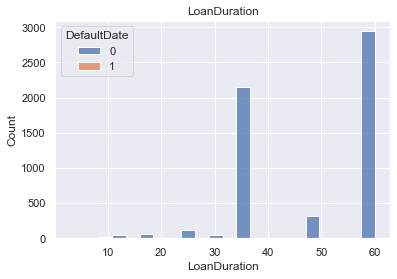

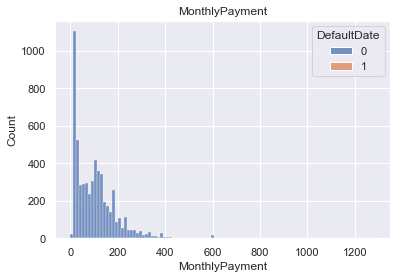

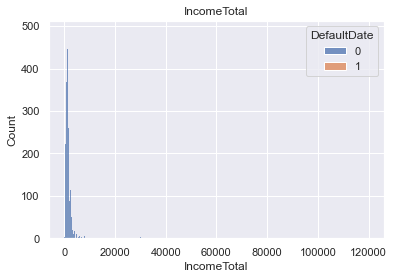

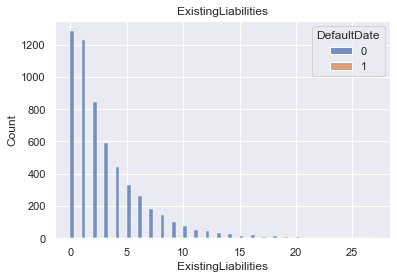

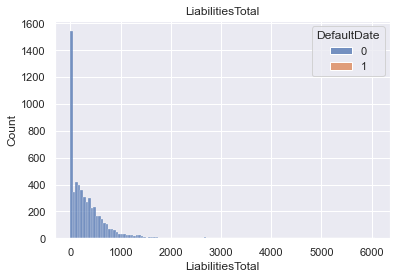

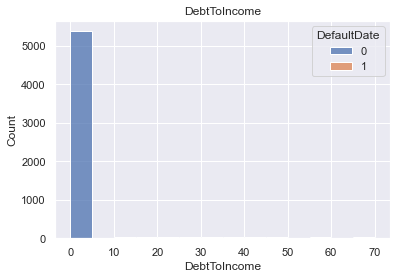

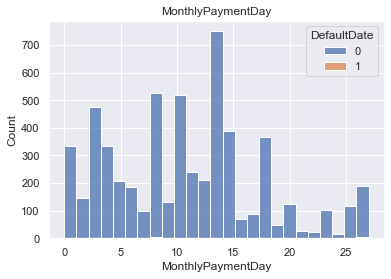

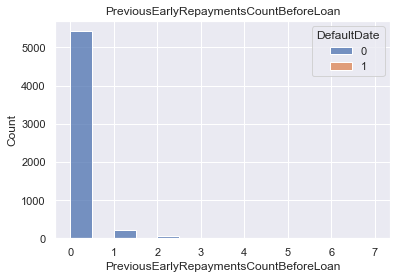

In [70]:
for col in v:
    ax = plt.subplot()
    sns.histplot(data = to_plot, x = col, hue = 'DefaultDate',multiple = 'stack', ax = ax)
    ax.set_title(f'{col}')
    plt.show()

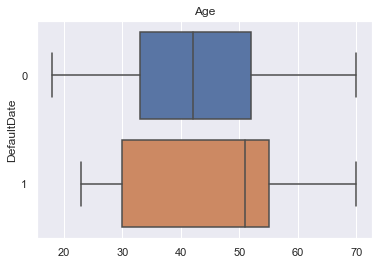

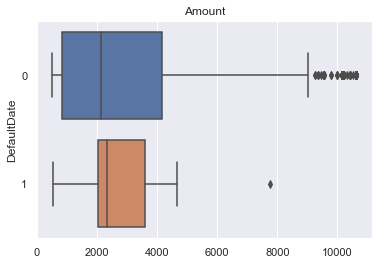

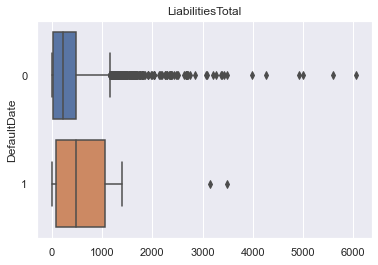

In [71]:
y_to_plot = to_plot['DefaultDate'].astype(str)
for col in b_vars:
    ax = plt.subplot()
    sns.boxplot(data = to_plot, x = col, y = y_to_plot,
                ax = ax, order = ['0', '1'])
    ax.set_title(f'{col}')
    ax.set_xlabel('')
    plt.show()

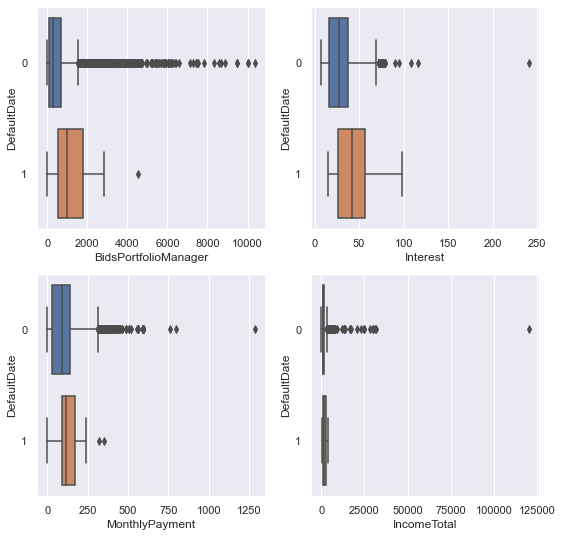

In [72]:
selected = ['BidsPortfolioManager', 'Interest','MonthlyPayment', 'IncomeTotal']
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (9, 9))
for var, ax in zip(selected, axes.ravel()):
    sns.boxplot(data = to_plot, x = var, y = y_to_plot,
                ax = ax, order = ['0', '1'])

In [73]:
# dropping outliers
df.drop(df[df['Age'] < 18].index, axis = 0, inplace = True)
df.drop(df[df['LiabilitiesTotal'] > 30000].index, axis = 0, inplace = True)

In [74]:
temp = df.copy()
numerical = temp.columns[df.dtypes != 'object']
num_vars = temp[numerical]
new_sample = num_vars.sample(frac = 0.1, random_state = 0)

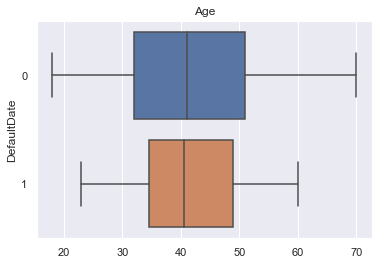

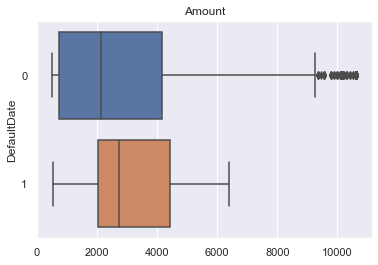

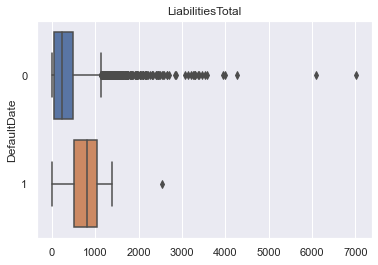

In [75]:
y_new = new_sample['DefaultDate'].astype(str)
for col in b_vars:
    ax = plt.subplot()
    sns.boxplot(data = new_sample, x = col, y = y_new, ax = ax)
    ax.set_title(f'{col}')
    ax.set_xlabel('')
    plt.show()

In [76]:
missing = df.isna().sum().apply(lambda x: x / df.shape[0]).sort_values(ascending = False)
print(missing[missing > 0])
print(df[missing[missing > 0].index].dtypes)

MonthlyPayment    0.001015
dtype: float64
MonthlyPayment    float64
dtype: object


In [77]:
# saving data
df.to_csv(path_or_buf = 'Bondoracleaned.csv', index = None)

##### Import Libraries and Packages

In [78]:
import pandas as pd
import numpy as np
#!pip install xlrd --upgrade 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.special import expit, logit
from scipy.optimize import minimize
from mlxtend.plotting import plot_decision_regions

##### Run this upgrade to ensure XLRD is at its latest version.

Restart Kernel after this and comment out this code block.

In [79]:
#pip install xlrd --upgrade 

#Data import

In [80]:
df = pd.read_csv('Bondoracleaned.csv')

# Exploratory Data Analysis (EDA)

In [81]:
df.head(5)

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,Age,Gender,Country,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,DefaultDate,Rating,Restructured,CreditScoreEsMicroL,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,1355,0,645.0,Yes,Income verified,28,Male,FI,2000.0,24.46,60,63.90,Other,Higher,Cohabitant,FullyEmployed,UpTo2Years,Construction,Owner,2097.0,1,629.00,0,3.05,1404.10,15,0,D,Yes,Other,0.0,0
1,1000,0,0.0,No,Income and expenses verified,27,Male,EE,1000.0,17.74,60,28.17,Other,Secondary,Single,FullyEmployed,UpTo1Year,Other,Jointtenant,560.0,8,1327.37,2,47.56,43.67,6,0,B,Yes,Other,1300.0,0
2,2345,0,655.0,No,Income verified,29,Male,EE,3000.0,17.87,60,84.72,Other,Basic,Single,FullyEmployed,UpTo3Years,Processing,"Tenant,pre-furnishedproperty",745.0,4,427.03,0,27.48,290.28,14,0,B,Yes,Other,1000.0,0
3,2045,0,955.0,Yes,Income verified,25,Male,FI,3000.0,27.98,60,102.12,LoanConsolidation,Vocational,Single,FullyEmployed,UpTo5Years,Telecom,"Tenant,unfurnishedproperty",1530.0,4,955.00,0,36.41,472.88,27,0,D,Yes,Other,0.0,0
4,1500,0,0.0,Yes,Income unverified,30,Male,EE,1500.0,29.25,60,52.84,Other,Secondary,Cohabitant,Entrepreneur,MoreThan5Years,Utilities,"Tenant,pre-furnishedproperty",1500.0,2,465.00,0,4.52,982.16,25,0,D,No,Other,0.0,0


In [82]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57128 entries, 0 to 57127
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    57128 non-null  int64  
 1   BidsApi                                 57128 non-null  int64  
 2   BidsManual                              57128 non-null  float64
 3   NewCreditCustomer                       57128 non-null  object 
 4   VerificationType                        57128 non-null  object 
 5   Age                                     57128 non-null  int64  
 6   Gender                                  57128 non-null  object 
 7   Country                                 57128 non-null  object 
 8   Amount                                  57128 non-null  float64
 9   Interest                                57128 non-null  float64
 10  LoanDuration                            57128 non-null  in

### Some Visualization and Data Exploration

1) Let's find the overall description of our dataset now

In [83]:
df.describe(include="all")

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,Age,Gender,Country,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,DefaultDate,Rating,Restructured,CreditScoreEsMicroL,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
count,57128.000000,57128.000000,57128.000000,57128,57128,57128.000000,57128,57128,57128.000000,57128.000000,57128.000000,57070.000000,57128,57128,57128,57128,57128,57128,57128,57128.000000,57128.000000,57128.000000,57128.000000,57128.000000,57128.00000,57128.000000,57128.000000,57128,57128,57128,57128.000000,57128.000000
unique,NaN,NaN,NaN,2,4,NaN,3,4,NaN,NaN,NaN,NaN,10,6,6,6,9,20,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2,9,NaN,NaN
top,NaN,NaN,NaN,Yes,Income and expenses verified,NaN,Male,EE,NaN,NaN,NaN,NaN,Not_set,Secondary,Not_specified,Not_defined,MoreThan5Years,Not_mentioned,Owner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,No,M,NaN,NaN
freq,NaN,NaN,NaN,28935,33138,NaN,34953,37437,NaN,NaN,NaN,NaN,53763,22769,53763,53763,22759,53763,22739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12170,45008,53216,NaN,NaN
mean,620.983283,24.163843,554.364427,NaN,NaN,42.453911,NaN,NaN,2640.539578,29.912799,48.490372,105.068175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1525.909474,2.952773,346.208745,0.034501,2.025261,21.97547,10.854432,0.002118,NaN,NaN,NaN,3811.734841,0.059656
std,971.628304,129.668586,641.089220,NaN,NaN,12.375195,NaN,NaN,2175.122473,17.184429,13.031492,87.742902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2429.095609,3.313329,468.998894,0.377547,9.216802,137.26665,6.617161,0.045974,NaN,NaN,NaN,5078.776692,0.321933
min,0.000000,0.000000,0.000000,NaN,NaN,18.000000,NaN,NaN,260.000000,7.270000,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,-26.48000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000
25%,106.000000,0.000000,164.000000,NaN,NaN,33.000000,NaN,NaN,850.000000,16.100000,36.000000,31.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,840.000000,1.000000,37.000000,0.000000,0.000000,0.00000,5.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000
50%,277.500000,0.000000,349.000000,NaN,NaN,42.000000,NaN,NaN,2125.000000,27.070000,60.000000,90.730000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200.000000,2.000000,235.000000,0.000000,0.000000,0.00000,10.000000,0.000000,NaN,NaN,NaN,2000.000000,0.000000
75%,682.000000,5.000000,712.000000,NaN,NaN,52.000000,NaN,NaN,4150.000000,37.500000,60.000000,143.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800.000000,4.000000,485.347500,0.000000,0.000000,0.00000,15.000000,0.000000,NaN,NaN,NaN,5845.000000,0.000000


Gender Distribution Plot

Male(1) vs Female(2) Counts and Plot

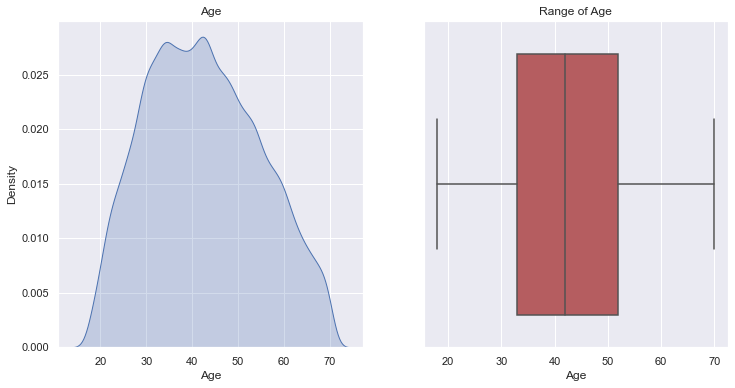

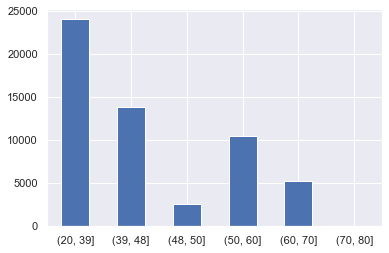

(20, 39]    24061
(39, 48]    13818
(50, 60]    10503
(60, 70]     5213
(48, 50]     2630
(70, 80]        0
Name: Age, dtype: int64

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.kdeplot(data=df, x="Age", color='b',fill=True, ax=axes[0])
sns.boxplot (x=df.Age, color='r', ax=axes[1])

axes[0]. set_title('Age')
axes[1].set_title( 'Range of Age')
plt.show()
grp = pd.cut(df['Age'], bins=[20, 39, 48, 50, 60,70,80],include_lowest=False)
ax = grp.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
plt.show()
print('')
grp.value_counts()

DEFAULT

0:NO <br>
1:YES <br>

0    57007
1      121
Name: DefaultDate, dtype: int64



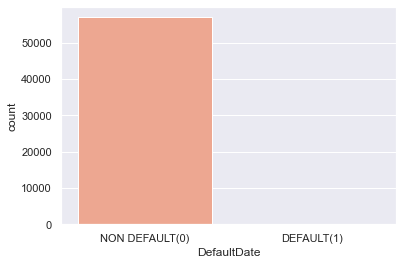

In [85]:
print(df['DefaultDate'].value_counts())
print('')
sns.countplot(data=df,x='DefaultDate',palette='Reds')
plt.xticks(np.arange(2),['NON DEFAULT(0)','DEFAULT(1)'])
plt.show()

# Data Wrangling

### Dropping y labels and storing it in a different variable

In [86]:
y = df['DefaultDate']
X = df.drop('DefaultDate', axis = 1)

### Check Correlation

### Nominal vs Ordinal Features

In [87]:
{column: len(df[column].unique()) for column in df.columns}

{'BidsPortfolioManager': 4061,
 'BidsApi': 772,
 'BidsManual': 3194,
 'NewCreditCustomer': 2,
 'VerificationType': 4,
 'Age': 53,
 'Gender': 3,
 'Country': 4,
 'Amount': 1531,
 'Interest': 3295,
 'LoanDuration': 10,
 'MonthlyPayment': 14663,
 'UseOfLoan': 10,
 'Education': 6,
 'MaritalStatus': 6,
 'EmploymentStatus': 6,
 'EmploymentDurationCurrentEmployer': 9,
 'OccupationArea': 20,
 'HomeOwnershipType': 11,
 'IncomeTotal': 2642,
 'ExistingLiabilities': 36,
 'LiabilitiesTotal': 27071,
 'RefinanceLiabilities': 17,
 'DebtToIncome': 2589,
 'FreeCash': 3213,
 'MonthlyPaymentDay': 28,
 'DefaultDate': 2,
 'Rating': 9,
 'Restructured': 2,
 'CreditScoreEsMicroL': 9,
 'AmountOfPreviousLoansBeforeLoan': 7307,
 'PreviousEarlyRepaymentsCountBeforeLoan': 9}

In [88]:
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,Age,Gender,Country,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,DefaultDate,Rating,Restructured,CreditScoreEsMicroL,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,1355,0,645.0,Yes,Income verified,28,Male,FI,2000.0,24.46,60,63.90,Other,Higher,Cohabitant,FullyEmployed,UpTo2Years,Construction,Owner,2097.0,1,629.00,0,3.05,1404.10,15,0,D,Yes,Other,0.0,0
1,1000,0,0.0,No,Income and expenses verified,27,Male,EE,1000.0,17.74,60,28.17,Other,Secondary,Single,FullyEmployed,UpTo1Year,Other,Jointtenant,560.0,8,1327.37,2,47.56,43.67,6,0,B,Yes,Other,1300.0,0
2,2345,0,655.0,No,Income verified,29,Male,EE,3000.0,17.87,60,84.72,Other,Basic,Single,FullyEmployed,UpTo3Years,Processing,"Tenant,pre-furnishedproperty",745.0,4,427.03,0,27.48,290.28,14,0,B,Yes,Other,1000.0,0
3,2045,0,955.0,Yes,Income verified,25,Male,FI,3000.0,27.98,60,102.12,LoanConsolidation,Vocational,Single,FullyEmployed,UpTo5Years,Telecom,"Tenant,unfurnishedproperty",1530.0,4,955.00,0,36.41,472.88,27,0,D,Yes,Other,0.0,0
4,1500,0,0.0,Yes,Income unverified,30,Male,EE,1500.0,29.25,60,52.84,Other,Secondary,Cohabitant,Entrepreneur,MoreThan5Years,Utilities,"Tenant,pre-furnishedproperty",1500.0,2,465.00,0,4.52,982.16,25,0,D,No,Other,0.0,0


In [89]:
edu_df = pd.get_dummies(X['Education'], prefix = 'EDU')
mar_df = pd.get_dummies(X['MaritalStatus'], prefix = 'MAR')

In [90]:
X.columns
#X.head()

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'VerificationType', 'Age', 'Gender', 'Country', 'Amount', 'Interest',
       'LoanDuration', 'MonthlyPayment', 'UseOfLoan', 'Education',
       'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'MonthlyPaymentDay', 'Rating', 'Restructured', 'CreditScoreEsMicroL',
       'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan'],
      dtype='object')

### Encoding

In [91]:
categorical_cols=[col for col in X.columns if X[col].dtype==object]
print("No of Categorical features =",len(categorical_cols))

No of Categorical features = 14


In [92]:
categorical_columns=X.select_dtypes('object')
categorical_columns.head()
categorical_columns.shape

(57128, 14)

In [93]:
# numerical_columns.isnull().sum()
categorical_columns=categorical_columns.fillna(categorical_columns.mode().iloc[0])
categorical_columns.isnull().sum()
categorical_columns.head()

,NewCreditCustomer,VerificationType,Gender,Country,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,Restructured,CreditScoreEsMicroL
0,Yes,Income verified,Male,FI,Other,Higher,Cohabitant,FullyEmployed,UpTo2Years,Construction,Owner,D,Yes,Other
1,No,Income and expenses verified,Male,EE,Other,Secondary,Single,FullyEmployed,UpTo1Year,Other,Jointtenant,B,Yes,Other
2,No,Income verified,Male,EE,Other,Basic,Single,FullyEmployed,UpTo3Years,Processing,"Tenant,pre-furnishedproperty",B,Yes,Other
3,Yes,Income verified,Male,FI,LoanConsolidation,Vocational,Single,FullyEmployed,UpTo5Years,Telecom,"Tenant,unfurnishedproperty",D,Yes,Other
4,Yes,Income unverified,Male,EE,Other,Secondary,Cohabitant,Entrepreneur,MoreThan5Years,Utilities,"Tenant,pre-furnishedproperty",D,No,Other


In [94]:
def Categorical_Summary():
    for col in categorical_cols:
        print(col)
        print("No of Missin Values =",X[col].isnull().sum())
        print(X[col].value_counts())
        print("="*50)

In [95]:
Categorical_Summary()

NewCreditCustomer
No of Missin Values = 0
Yes    28935
No     28193
Name: NewCreditCustomer, dtype: int64
VerificationType
No of Missin Values = 0
Income and expenses verified                    33138
Income unverified                               23022
Income verified                                   967
Income unverified, cross-referenced by phone        1
Name: VerificationType, dtype: int64
Gender
No of Missin Values = 0
Male         34953
Female       17281
Undefined     4894
Name: Gender, dtype: int64
Country
No of Missin Values = 0
EE    37437
FI    11970
ES     7719
SK        2
Name: Country, dtype: int64
UseOfLoan
No of Missin Values = 0
Not_set              53763
HomeImprovement       1089
Other                  772
LoanConsolidation      495
Vehicle                266
Business               207
Travel                 166
Health                 151
RealEstate             112
Education              107
Name: UseOfLoan, dtype: int64
Education
No of Missin Values = 0
Secondary

In [96]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
categorical_columns.shape

(57128, 14)

In [97]:
encode_cat = categorical_columns.apply(LabelEncoder().fit_transform)
encode_cat

,NewCreditCustomer,VerificationType,Gender,Country,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,Restructured,CreditScoreEsMicroL
0,1,3,1,2,6,1,0,1,5,4,8,4,1,8
1,0,0,1,0,6,4,4,1,4,12,3,2,1,8
2,0,3,1,0,6,0,4,1,6,13,9,2,1,8
3,1,3,1,2,4,5,4,1,8,17,10,4,1,8
4,1,1,1,0,6,4,0,0,0,19,9,4,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57123,0,0,1,0,3,0,0,1,4,4,8,3,1,8
57124,1,0,1,0,6,4,2,1,0,13,8,2,0,8
57125,1,3,0,2,6,5,2,1,0,8,8,3,1,8
57126,1,0,0,0,9,4,0,1,4,13,2,7,1,8


In [98]:
df_main_dummy = pd.concat([encode_cat], axis=1)

# display first five observations
df_main_dummy.head()

,NewCreditCustomer,VerificationType,Gender,Country,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,Restructured,CreditScoreEsMicroL
0,1,3,1,2,6,1,0,1,5,4,8,4,1,8
1,0,0,1,0,6,4,4,1,4,12,3,2,1,8
2,0,3,1,0,6,0,4,1,6,13,9,2,1,8
3,1,3,1,2,4,5,4,1,8,17,10,4,1,8
4,1,1,1,0,6,4,0,0,0,19,9,4,0,8


In [99]:
df_main_dummy.shape

(57128, 14)

In [100]:
X = pd.concat([df_main_dummy, edu_df, mar_df], axis = 1)

In [101]:
X.head()

,NewCreditCustomer,VerificationType,Gender,Country,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,Restructured,CreditScoreEsMicroL,EDU_Basic,EDU_Higher,EDU_Not_present,EDU_Primary,EDU_Secondary,EDU_Vocational,MAR_Cohabitant,MAR_Divorced,MAR_Married,MAR_Not_specified,MAR_Single,MAR_Widow
0,1,3,1,2,6,1,0,1,5,4,8,4,1,8,0,1,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,6,4,4,1,4,12,3,2,1,8,0,0,0,0,1,0,0,0,0,0,1,0
2,0,3,1,0,6,0,4,1,6,13,9,2,1,8,1,0,0,0,0,0,0,0,0,0,1,0
3,1,3,1,2,4,5,4,1,8,17,10,4,1,8,0,0,0,0,0,1,0,0,0,0,1,0
4,1,1,1,0,6,4,0,0,0,19,9,4,0,8,0,0,0,0,1,0,1,0,0,0,0,0


In [102]:
X = X.drop(['Education', 'MaritalStatus'], axis = 1)
X = X.copy()

In [103]:
X.head()

,NewCreditCustomer,VerificationType,Gender,Country,UseOfLoan,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,Restructured,CreditScoreEsMicroL,EDU_Basic,EDU_Higher,EDU_Not_present,EDU_Primary,EDU_Secondary,EDU_Vocational,MAR_Cohabitant,MAR_Divorced,MAR_Married,MAR_Not_specified,MAR_Single,MAR_Widow
0,1,3,1,2,6,1,5,4,8,4,1,8,0,1,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,6,1,4,12,3,2,1,8,0,0,0,0,1,0,0,0,0,0,1,0
2,0,3,1,0,6,1,6,13,9,2,1,8,1,0,0,0,0,0,0,0,0,0,1,0
3,1,3,1,2,4,1,8,17,10,4,1,8,0,0,0,0,0,1,0,0,0,0,1,0
4,1,1,1,0,6,0,0,19,9,4,0,8,0,0,0,0,1,0,1,0,0,0,0,0


In [104]:
X.head(), X.mean()

(   NewCreditCustomer  VerificationType  Gender  Country  UseOfLoan  \
 0                  1                 3       1        2          6   
 1                  0                 0       1        0          6   
 2                  0                 3       1        0          6   
 3                  1                 3       1        2          4   
 4                  1                 1       1        0          6   
 
    EmploymentStatus  EmploymentDurationCurrentEmployer  OccupationArea  \
 0                 1                                  5               4   
 1                 1                                  4              12   
 2                 1                                  6              13   
 3                 1                                  8              17   
 4                 0                                  0              19   
 
    HomeOwnershipType  Rating  Restructured  CreditScoreEsMicroL  EDU_Basic  \
 0                  8       4            

# Train Model using packages to compare Accuracy between different models

## Train - Test Split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [107]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [108]:
# Most important features based on RF
importances = {X.columns[i]:val \
               for i,val in enumerate(rf.feature_importances_)}
df_imp = pd.DataFrame.from_dict(importances, orient = 'index', columns = ['importance'])

In [109]:
sorted_features = df_imp['importance'].sort_values(ascending = False)
important_vars = sorted_features[sorted_features > 0.01]

In [110]:
idx = important_vars.index

[Text(0, 0, 'Rating'),
 Text(0, 1, 'EmploymentDurationCurrentEmployer'),
 Text(0, 2, 'HomeOwnershipType'),
 Text(0, 3, 'VerificationType'),
 Text(0, 4, 'OccupationArea'),
 Text(0, 5, 'Gender'),
 Text(0, 6, 'UseOfLoan'),
 Text(0, 7, 'NewCreditCustomer'),
 Text(0, 8, 'Country'),
 Text(0, 9, 'Restructured'),
 Text(0, 10, 'EDU_Higher'),
 Text(0, 11, 'EmploymentStatus'),
 Text(0, 12, 'EDU_Secondary'),
 Text(0, 13, 'EDU_Vocational'),
 Text(0, 14, 'MAR_Married'),
 Text(0, 15, 'MAR_Single'),
 Text(0, 16, 'CreditScoreEsMicroL'),
 Text(0, 17, 'MAR_Cohabitant')]

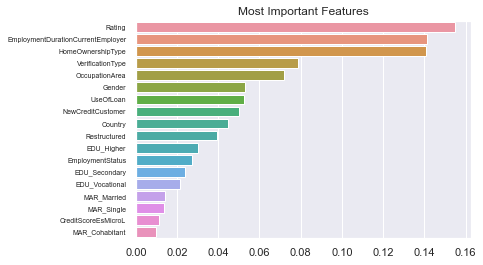

In [111]:
ax = plt.subplot()
sns.barplot(x = important_vars.values, y = idx, order = idx, ax = ax)
ax.set_title('Most Important Features')
ax.set_yticklabels(labels = idx, rotation = 0, fontsize = 7)

In [112]:
X.head()

,NewCreditCustomer,VerificationType,Gender,Country,UseOfLoan,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,Restructured,CreditScoreEsMicroL,EDU_Basic,EDU_Higher,EDU_Not_present,EDU_Primary,EDU_Secondary,EDU_Vocational,MAR_Cohabitant,MAR_Divorced,MAR_Married,MAR_Not_specified,MAR_Single,MAR_Widow
0,1,3,1,2,6,1,5,4,8,4,1,8,0,1,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,6,1,4,12,3,2,1,8,0,0,0,0,1,0,0,0,0,0,1,0
2,0,3,1,0,6,1,6,13,9,2,1,8,1,0,0,0,0,0,0,0,0,0,1,0
3,1,3,1,2,4,1,8,17,10,4,1,8,0,0,0,0,0,1,0,0,0,0,1,0
4,1,1,1,0,6,0,0,19,9,4,0,8,0,0,0,0,1,0,1,0,0,0,0,0


In [113]:
#Scaling
#To standardize all columns to make it even and values lie around 0

scalar_np = StandardScaler()
X_np = scalar_np.fit_transform(X) # Returns numpy array, converting to PD in next line
X = pd.DataFrame(X_np, columns = X.columns)
# Mean of all columns are now very close to 0

X.head(), X.mean()

(   NewCreditCustomer  VerificationType    Gender   Country  UseOfLoan  \
 0           0.987095          4.307163  0.371232  1.771093   1.750402   
 1          -1.013074         -0.767661  0.371232 -0.679029   1.750402   
 2          -1.013074          4.307163  0.371232 -0.679029   1.750402   
 3           0.987095          4.307163  0.371232  1.771093  -1.630215   
 4           0.987095          0.923947  0.371232 -0.679029   1.750402   
 
    EmploymentStatus  EmploymentDurationCurrentEmployer  OccupationArea  \
 0         -3.121392                           0.546797       -5.608186   
 1         -3.121392                           0.242363        0.837436   
 2         -3.121392                           0.851232        1.643138   
 3         -3.121392                           1.460102        4.865949   
 4         -6.400579                          -0.975376        6.477354   
 
    HomeOwnershipType    Rating  Restructured  CreditScoreEsMicroL  EDU_Basic  \
 0           0.468662

## Logistic Regression

In [114]:
model_LR = LogisticRegression(solver = 'lbfgs', max_iter = 5000).fit(X_train, y_train)

In [115]:
model_LR.score(X_test, y_test) * 100 # Accuracy

99.73744092420795

In [116]:
X_test.head()

,NewCreditCustomer,VerificationType,Gender,Country,UseOfLoan,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,Restructured,CreditScoreEsMicroL,EDU_Basic,EDU_Higher,EDU_Not_present,EDU_Primary,EDU_Secondary,EDU_Vocational,MAR_Cohabitant,MAR_Divorced,MAR_Married,MAR_Not_specified,MAR_Single,MAR_Widow
34085,1,1,0,0,5,2,2,11,8,4,0,0,0,0,0,0,0,1,0,0,0,1,0,0
37943,0,1,1,2,5,2,0,11,5,5,0,0,0,0,0,0,0,1,0,0,0,1,0,0
53896,0,0,0,0,5,2,0,11,8,4,0,0,0,0,0,0,0,1,0,0,0,1,0,0
932,1,0,0,0,2,5,0,9,8,3,0,8,0,0,0,0,0,1,0,0,1,0,0,0
19600,0,1,1,2,5,2,0,11,9,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [117]:
model_gnb = GaussianNB().fit(X_train, y_train)
model_gnb.score(X_test, y_test) * 100 #Accuracy

94.18869245580255

In [118]:
y_gnb_vals = pd.DataFrame(model_gnb.predict(X_test))
y_gnb_vals.index = y_test. index
pd.concat([y_gnb_vals, y_test], axis = 1).head(10) # Many missclassfications

,0,DefaultDate
34085,0,0
37943,0,0
53896,0,0
932,1,0
19600,0,0
39214,0,0
13176,0,0
14499,0,0
19245,0,0
55929,0,0


## SVM

In [119]:
model_svm = svm.SVC().fit(X_train, y_train)
model_svm.score(X_test, y_test) * 100

99.73744092420795

## KNN

In [120]:
model_neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
model_neigh.score(X_test, y_test) * 100

99.72868895501487

## Custom Base Logistic Regression Model

In [121]:
class LogisticRegression_Cust:
    
    def __init__(self, X, y, learningRate = 0.01, tolerance=0, maxIteration = 5000):
        self.X = X
        self.y = y
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        
    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
    
    def sigmoid(self, X):
        #z = X.dot(self.w)
        #sig = 1 / (1+np.exp(-z))
        #return sig
        return expit(X)
    
    def costFunction(self, X, y):
        
        pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
        cost = pred_.mean()
        return cost
    
    def gradientRegularized(self, X, y):
        lambda_term = 0
        sigmoid = self.sigmoid(X.dot(self.w))
        gradient = (sigmoid - y).dot(X)*(1/X.shape[0]) + lambda_term*self.w
        return gradient
    
    def gradientDescent(self, X, y):
        errors = []
        last = float('inf')
        
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradientRegularized(X, y)
            curr = self.costFunction(X, y)
            
            diff = last - curr
            last = curr
            
            errors.append(curr)
            
            if abs(diff) < self.tolerance:
                print("The model stopped learning")
                break  
                
        plt.xlabel('Iterations')
        plt.ylabel('Error')
        plt.ylim([-2500, 0])
        plt.plot(list(range(self.maxIteration)), errors, '-r')
        
    def predict(self, X):
        pred = self.sigmoid(X.dot(self.w))
        return np.around(pred)
    
    def evaluate(self, y, y_hat):
        
        y = (y == 1)
        y_hat = (y_hat == 1)
        
        accuracy = (y == y_hat).sum() / y.size
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        
        return recall, precision, accuracy
    
    def fit(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, train_size = 0.8, random_state = 10)
        
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
        self.gradientDescent(self.X_train, self.y_train)
        
        #print(self.w)
        
        y_hat_train = self.predict(self.X_train)
        recall, precision, accuracy = self.evaluate(self.y_train, y_hat_train)
        
        print('Over Training Model:')
        print("Accuracy was:", accuracy*100)
        print("Recall was:", recall*100)
        print("Precision was:", precision*100)

        y_hat_test = self.predict(self.X_test)
        recall, precision, accuracy = self.evaluate(self.y_test, y_hat_test)
        
        print('')
        print('Over Testing Model:')
        print("Accuracy was:", accuracy*100)
        print("Recall was:", recall*100)
        print("Precision was:", precision*100)
        

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:39<00:00, 128.07it/s]


Over Training Model:
Accuracy was: 52.46378714279463
Recall was: 97.84946236559139
Precision was: 0.4171632896305125

Over Testing Model:
Accuracy was: 50.69140556625241
Recall was: 89.28571428571429
Precision was: 0.442008486562942


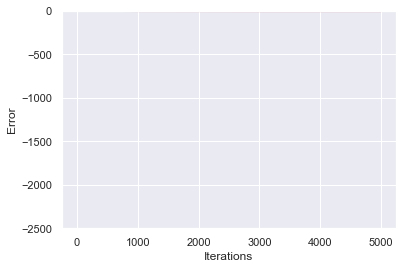

In [122]:
lr = LogisticRegression_Cust(X, y)
lr.fit()

## Classification plot for LR

[Text(0.5, 1.0, 'Logistic Regression Curve - DebitoIncome vs. Default')]

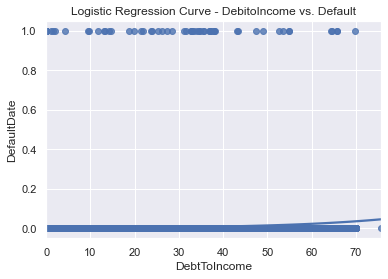

In [123]:
x1 = df['DebtToIncome']
sns.regplot(x = x1, y = y, data=df, logistic=True, ci=None).set(title='Logistic Regression Curve - DebitoIncome vs. Default')

## Soft Margin SVM

In [124]:
class MaxMarginClassifier:
    def __init__(self, C):
        self.C = C
    
    def fit(self, X, y):
        N = len(y)
        Xy = X * y[:, np.newaxis]
        Gramxy = np.matmul(Xy, Xy.T)
        def ld0(G, alpha):
            return alpha.sum() - 0.5*alpha.dot(alpha.dot(G))
        
        def derivationLd0(G, alpha):
            return np.ones_like(alpha) - alpha.dot(G)
        
        alpha = np.ones(N)
        
        A = np.vstack((-np.eye(N), np.eye(N)))
        b = np.concatenate((np.zeros(N), self.C * np.ones(N)))
        
        
        
        constraints = ({'type': 'eq', 'fun': lambda a: np.dot(a,y) , 'jac' : lambda a: y},
                      {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})
        
        
        
        optRes = minimize(fun = lambda a: -ld0(Gramxy, a),
                                   x0 = alpha,
                                   jac = lambda a: - derivationLd0(Gramxy, a),
                                   constraints = constraints)
                
        self.alpha = optRes.x
        self.w = np.sum((self.alpha[:, np.newaxis] * Xy), axis = 0)
  
        epsilons = 1e-6
        
        self.supportVectors = X[self.alpha > epsilons] #support vector points
        self.supportLabels = y[self.alpha > epsilons]
        
        b = []
        for i in range(len(self.supportVectors)):
            b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)
            b.append(b_i)
            
        self.intercept = sum(b)/len(b)
        
        signedDist = np.matmul(self.supportVectors, self.w)
    
    def predict(self, X):
        return 2*(np.matmul(X, self.w) + self.intercept > 0) - 1

**We will be using a smaller training set over this particular model because the optimize minimize function was taking forever to run over the original training model. The system kept crashing because 8GB of RAM was not enough.**

In [125]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X, y, train_size = 0.03, random_state = True, stratify = y)

In [126]:
model = MaxMarginClassifier( C = 62 ) #, gamma = 0.008, kernel = 'rbf' )

model.fit(X_train_small.to_numpy(), y_train_small.to_numpy())

y_pred_small = model.predict(X_train_small)
y_train1_small = (y_train_small == 1)
y_pred1_small = (y_pred_small == 1)
        
accuracy = (y_train1_small == y_pred1_small).sum() / y_train1_small.size
precision = (y_train1_small & y_pred1_small).sum() / y_pred1_small.sum()
recall = (y_train1_small & y_pred1_small).sum() / y_train1_small.sum()
print("Training:")
print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)

y_pred_test_small = model.predict(X_test_small)
y_test1_small = (y_test_small == 1)
y_pred1_test_small = (y_pred_test_small == 1)
        
accuracy = (y_test1_small == y_pred1_test_small).sum() / y_test1_small.size
precision = (y_test1_small & y_pred1_test_small).sum() / y_pred1_test_small.sum()
recall = (y_test1_small & y_pred1_test_small).sum() / y_test1_small.sum()
print("Test")
print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)

Training:
Accuracy: 67.77583187390543
Precision: 0.18181818181818182
Recall: 25.0
Test
Accuracy: 68.53018135883786
Precision: 0.2584424534803584
Recall: 38.46153846153847


In [127]:
import joblib
joblib.dump(lr,"model.pkl")

['model.pkl']

In [128]:
model=joblib.load('model.pkl')
model.predict(X_test_small)

49260    1.0
22487    0.0
38686    1.0
45417    0.0
1207     1.0
        ... 
43819    1.0
50166    0.0
20395    1.0
25507    0.0
28078    1.0
Length: 55415, dtype: float64